In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False


# from matplotlib import rc
# rc('font', family='AppleGothic')
# plt.rcParams['axes.unicode_minus'] = False

# 당선 예측

## 전처리

In [3]:
df = pd.read_csv('./data/news_2024_긍정부정_결과.csv')
# df = df[df['party_name'] != '코리아']

df

,party_content,party_name,label
0,지상파·종편 여론조사서 접전 양상…오차 범위 내 동률도신당 포함시 민주 33% 국힘...,더불어민주당,1
1,지상파·종편 여론조사서 접전 양상…오차 범위 내 동률도신당 포함시 민주 33% 국힘...,국민의힘,1
2,지상파·종편 여론조사서 접전 양상…오차 범위 내 동률도신당 포함시 민주 33% 국힘...,새로운미래,1
3,1 뉴스1 ⓒ News1 민경석 기자(서울=뉴스1) 노선웅 기자 = 올해 4월10일...,더불어민주당,0
4,1 뉴스1 ⓒ News1 민경석 기자(서울=뉴스1) 노선웅 기자 = 올해 4월10일...,국민의힘,0
...,...,...,...
187132,"이 의원은 이날 뉴스1 통화에서 ""(무소속 출마도) 충분히 자신 있다""며 ""당선 후...",무소속,0
187133,앞서 국민의힘 공천관리위원회는 이날 이 의원 지역구인 울산 남갑을 비롯해 강남갑·을...,국민의힘,0
187134,"대구 동갑은 류성걸 의원, 대구 북갑은 국민의힘 의원 지역구다",국민의힘,0
187135,"이 의원은 이날 페이스북에도 ""오늘 국민의힘이 저를 버렸다""며 ""잠시 떠나더라도 승...",국민의힘,0


In [4]:
df['label'].unique()

array([1, 0], dtype=int64)

In [5]:
df['label'] = df['label'].apply(lambda x: '긍정' if x == 1 else '부정')

In [6]:
df.head()

,party_content,party_name,label
0,지상파·종편 여론조사서 접전 양상…오차 범위 내 동률도신당 포함시 민주 33% 국힘...,더불어민주당,긍정
1,지상파·종편 여론조사서 접전 양상…오차 범위 내 동률도신당 포함시 민주 33% 국힘...,국민의힘,긍정
2,지상파·종편 여론조사서 접전 양상…오차 범위 내 동률도신당 포함시 민주 33% 국힘...,새로운미래,긍정
3,1 뉴스1 ⓒ News1 민경석 기자(서울=뉴스1) 노선웅 기자 = 올해 4월10일...,더불어민주당,부정
4,1 뉴스1 ⓒ News1 민경석 기자(서울=뉴스1) 노선웅 기자 = 올해 4월10일...,국민의힘,부정


In [7]:
res_dic = {}


for party, label in zip(df['party_name'], df['label']):
    if party not in res_dic:
        res_dic[party] = {'긍정' : 0, '부정' : 0}
    else:
        res_dic[party][label] += 1

for party, counts in res_dic.items():
    print('당 : {}'.format(party))
    print('긍정 : {}'.format(counts['긍정']))
    print('부정 : {}'.format(counts['부정']))   

당 : 더불어민주당
긍정 : 17936
부정 : 39276
당 : 국민의힘
긍정 : 31371
부정 : 53539
당 : 새로운미래
긍정 : 4287
부정 : 6591
당 : 개혁신당
긍정 : 6311
부정 : 11914
당 : 진보당
긍정 : 923
부정 : 2930
당 : 자유통일당
긍정 : 260
부정 : 304
당 : 신한반도당
긍정 : 0
부정 : 1
당 : 무소속
긍정 : 474
부정 : 2348
당 : 조국혁신당
긍정 : 599
부정 : 2401
당 : 노동당
긍정 : 48
부정 : 158
당 : 소나무당
긍정 : 37
부정 : 145
당 : 녹색정의당
긍정 : 744
부정 : 1799
당 : 자유민주당
긍정 : 4
부정 : 3
당 : 한국국민당
긍정 : 0
부정 : 2
당 : 우리공화당
긍정 : 8
부정 : 19
당 : 한국농어민당
긍정 : 3
부정 : 1
당 : 국민의미래
긍정 : 419
부정 : 980
당 : 새진보연합
긍정 : 381
부정 : 903


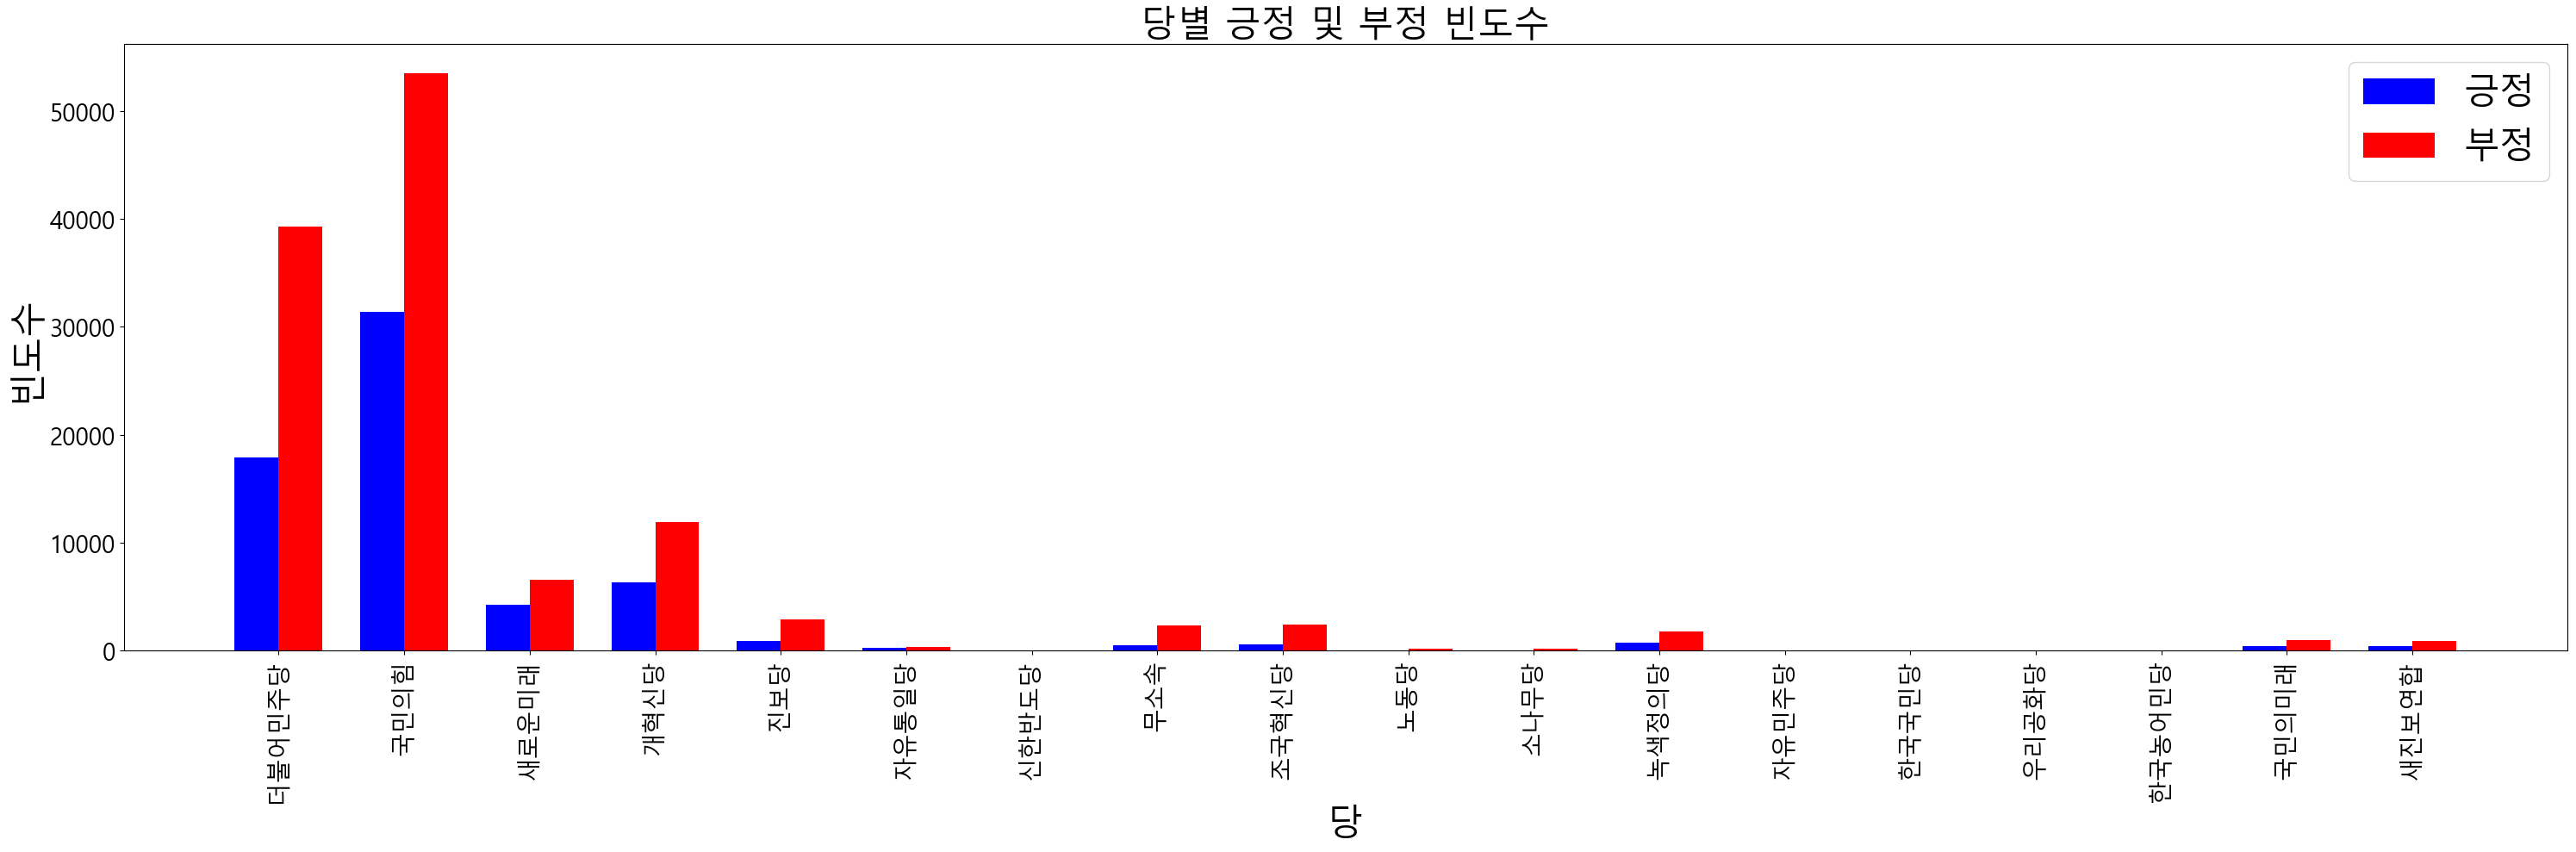

In [8]:
# 그래프를 그리기 위한 데이터 준비
parties = list(res_dic.keys())
positive_counts = [value['긍정'] for value in res_dic.values()]
negative_counts = [value['부정'] for value in res_dic.values()]

# 그래프 설정
bar_width = 0.35
index = np.arange(len(parties))  # 막대 그래프의 위치 설정

# 긍정과 부정을 나타내는 막대 그래프 그리기
plt.figure(figsize = (30, 10))
plt.bar(index, positive_counts, bar_width, label='긍정', color='blue', align='center')
plt.bar(index + bar_width, negative_counts, bar_width, label='부정', color='red', align='center')
plt.yticks(fontsize=20)

# 당 이름을 x축에 표시
plt.xlabel('당', fontsize = 30)
plt.ylabel('빈도수', fontsize = 30)
plt.title('당별 긍정 및 부정 빈도수', fontsize = 30)
plt.xticks(index + bar_width / 2, parties, rotation = 90, fontsize = 20)

# 범례 표시
plt.legend(fontsize = 30)

# 그래프 출력
plt.tight_layout()

In [9]:
num_df = pd.DataFrame(res_dic).T

print(num_df.shape)
num_df

(18, 2)


,긍정,부정
더불어민주당,17936,39276
국민의힘,31371,53539
새로운미래,4287,6591
개혁신당,6311,11914
진보당,923,2930
자유통일당,260,304
신한반도당,0,1
무소속,474,2348
조국혁신당,599,2401
노동당,48,158


In [10]:
num_df = num_df.reset_index()
num_df.columns = [['party', 'pos', 'neg']]
num_df.columns = num_df.columns.get_level_values(0)
num_df.columns

Index(['party', 'pos', 'neg'], dtype='object')

In [11]:
num_df['pos'] = num_df['pos'] / num_df['pos'].sum()
num_df['neg'] = num_df['neg'] / num_df['neg'].sum()
num_df

,party,pos,neg
0,더불어민주당,0.281106,0.318504
1,국민의힘,0.491670,0.434168
2,새로운미래,0.067189,0.053449
3,개혁신당,0.098911,0.096615
4,진보당,0.014466,0.023760
5,자유통일당,0.004075,0.002465
6,신한반도당,0.000000,0.000008
7,무소속,0.007429,0.019041
8,조국혁신당,0.009388,0.019471
9,노동당,0.000752,0.001281


In [12]:
df_2024 = num_df
lst = ['더불어민주당', '국민의힘', '녹색정의당', '개혁신당', '진보당', '새로운미래', '조국혁신당']

idx = []

for i in range(len(df_2024)):
    if df_2024.loc[i, 'party'] in lst:
        idx.append(i)
        
df_2024 = df_2024.loc[idx]
df_2024 = df_2024.reset_index(drop = True)

df_2024

,party,pos,neg
0,더불어민주당,0.281106,0.318504
1,국민의힘,0.491670,0.434168
2,새로운미래,0.067189,0.053449
3,개혁신당,0.098911,0.096615
4,진보당,0.014466,0.023760
5,조국혁신당,0.009388,0.019471
6,녹색정의당,0.011661,0.014589


In [32]:
# df_2020 = pd.read_csv('../data/news_2020_당선_결과_사전.csv')
df_2020 = pd.read_csv('./data/news_2020_결과_BertTokenizer.csv')

df_2016 = pd.read_csv('./data/2016_결과.csv')

In [33]:
# df_2020['res'] = df_2020['res'] / df_2020['res'].sum()
# df_2016['res'] = df_2016['res'] / df_2016['res'].sum()

In [34]:
# df_2020 = df_2020.drop('chair', axis = 1)
# df_2020

In [35]:
df_2016.columns = [['party', '2016_res', '2016_pos', '2016_neg']]
df_2020.columns = [['party', '2020_res', '2020_pos', '2020_neg']]

In [36]:
df_2016.columns = df_2016.columns.get_level_values(0)
df_2020.columns = df_2020.columns.get_level_values(0)

In [37]:
df = pd.merge(df_2016, df_2020, on='party', how='outer')
df = df.fillna(0)
df

,party,2016_res,2016_pos,2016_neg,2020_res,2020_pos,2020_neg
0,더불어민주당,81.0,9968.0,50432.0,163.0,7363.0,50104.0
1,새누리당,67.0,24055.0,65768.0,0.0,145.0,2387.0
2,국민의당,12.0,11765.0,46734.0,3.0,2020.0,9697.0
3,무소속,4.0,4306.0,16682.0,5.0,2647.0,9702.0
4,정의당,2.0,2798.0,7760.0,6.0,4285.0,13947.0
5,한국국민당,0.0,47.0,62.0,0.0,0.0,0.0
6,통일한국당,0.0,40.0,16.0,0.0,0.0,0.0
7,진리대한당,0.0,40.0,27.0,0.0,0.0,0.0
8,친반통합,0.0,35.0,23.0,0.0,0.0,0.0
9,일제·위안부·인권정당,0.0,1.0,6.0,0.0,0.0,0.0


In [38]:
df['tot_pos'] = df['2016_pos'] + df['2020_pos']
df['tot_neg'] = df['2016_neg'] + df['2020_neg']
df['tot_res'] = df['2016_res'] + df['2020_res']
df['pos'] = df['tot_pos'] / df['tot_pos'].sum()
df['neg'] = df['tot_neg'] / df['tot_neg'].sum()
df['res'] = df['tot_res'] / df['tot_res'].sum()

df = df[['party', 'pos', 'neg', 'res']]
df

,party,pos,neg,res
0,더불어민주당,0.158773,0.210011,0.523605
1,새누리당,0.221701,0.142370,0.143777
2,국민의당,0.126287,0.117880,0.032189
3,무소속,0.063698,0.055114,0.019313
4,정의당,0.064889,0.045344,0.017167
5,한국국민당,0.000431,0.000130,0.000000
6,통일한국당,0.000366,0.000033,0.000000
7,진리대한당,0.000366,0.000056,0.000000
8,친반통합,0.000321,0.000048,0.000000
9,일제·위안부·인권정당,0.000009,0.000013,0.000000


In [39]:
df['party'] = df['party'].replace('국민의당', '국민의힘')
df['party'] = df['party'].replace('녹생당', '녹색정의당')
df['party'] = df['party'].replace('개혁국민신당', '개혁신당')

C:\Users\mit005\AppData\Local\Temp\ipykernel_13200\182666947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['party'] = df['party'].replace('국민의당', '국민의힘')
C:\Users\mit005\AppData\Local\Temp\ipykernel_13200\182666947.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['party'] = df['party'].replace('녹생당', '녹색정의당')
C:\Users\mit005\AppData\Local\Temp\ipykernel_13200\182666947.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

## 모델

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder

In [41]:
X = df[['party', 'pos', 'neg']]
y = df['res']

In [42]:
enc = OneHotEncoder(handle_unknown='ignore')
party_encoded = enc.fit_transform(X[['party']])
party_df = pd.DataFrame(party_encoded.toarray(), columns=enc.get_feature_names_out(['party']))
X = pd.concat([X.drop('party', axis=1), party_df], axis=1)

In [43]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

# 검증 세트를 사용하여 예측 수행
y_pred = model.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.021216095262965157


In [45]:
X_2024 = df_2024[['party', 'pos', 'neg']]
party_encoded_2024 = enc.transform(X_2024[['party']])
party_df_2024 = pd.DataFrame(party_encoded_2024.toarray(), columns=enc.get_feature_names_out(['party']))
X_2024 = pd.concat([X_2024.drop('party', axis=1), party_df_2024], axis=1)
predictions_2024 = model.predict(X_2024)
df_2024['res'] = predictions_2024
print(df_2024)

    party       pos       neg       res
0  더불어민주당  0.281106  0.318504  0.028454
1    국민의힘  0.491670  0.434168  0.055394
2   새로운미래  0.067189  0.053449  0.012282
3    개혁신당  0.098911  0.096615  0.006623
4     진보당  0.014466  0.023760  0.009450
5   조국혁신당  0.009388  0.019471  0.009131
6   녹색정의당  0.011661  0.014589  0.009054


In [46]:
df_2024['res'] = df_2024['res'] * 300
df_2024

,party,pos,neg,res
0,더불어민주당,0.281106,0.318504,8.536323
1,국민의힘,0.491670,0.434168,16.618085
2,새로운미래,0.067189,0.053449,3.684694
3,개혁신당,0.098911,0.096615,1.986870
4,진보당,0.014466,0.023760,2.835138
5,조국혁신당,0.009388,0.019471,2.739418
6,녹색정의당,0.011661,0.014589,2.716183


In [47]:
df_2024['res'].sum()

39.11671170858543